## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 004 Example 001

## Part A

In [1]:
from sklearn.svm import LinearSVC # Core Requirement for Machine Learning
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix # Core Requirement for Machine Learning

import numpy as np # Core Requirement for data processing
import pandas as pd # Core Requirement for data processing

import os

import matplotlib.pyplot as plt # Core Requirement for Graphics Generation
%matplotlib inline

## Part B

In [2]:
def make_meshgrid(x, y, h=1):
    x_min, x_max = int(x.min()) - 1, int(x.max()) + 1
    y_min, y_max = int(y.min()) - 1, int(y.max()) + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

## Part C

In [3]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out    

## Part D

In [4]:
fileName = '../../Data/Cluster01.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrial Machine Learning\book\GitHub\Upload\industrial-machine-learning\Data\Cluster01.csv


In [5]:
ClusterDF=pd.read_csv(fileFullName, header=0, na_values='NaN')
print(ClusterDF.columns)

Index(['F01', 'F02', 'T'], dtype='object')


In [6]:
print(ClusterDF.describe())

               F01          F02            T
count  2500.000000  2500.000000  2500.000000
mean     -0.357842    48.737365     0.502000
std      62.145431    46.793813     0.500096
min    -138.533496  -122.941273     0.000000
25%     -50.596680    17.424954     0.000000
50%     -14.791261    47.037317     1.000000
75%      48.308780    81.998086     1.000000
max     209.938456   194.045940     1.000000


In [7]:
X=np.array(ClusterDF[['F01', 'F02']])
y=np.array(ClusterDF['T'])

## Part E

In [8]:
clfbad = LinearSVC(random_state=123, max_iter=4, dual=False, verbose=True, class_weight='balanced', multi_class='ovr')

In [9]:
clfbad.fit(X, y)

[LibLinear]

C:\Users\AndreVermeulen\.conda\envs\andre\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=4,
          multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
          verbose=True)

In [10]:
print('------------------------------------------------')
print('Coefficient:', clfbad.coef_)
print('------------------------------------------------')
print('Intercept', clfbad.intercept_)
print('------------------------------------------------')
print('Score', clfbad.score(X, y))
print('------------------------------------------------') 

------------------------------------------------
Coefficient: [[-0.01936987  0.00474329]]
------------------------------------------------
Intercept [-0.01397294]
------------------------------------------------
Score 0.8948
------------------------------------------------


## Part F

In [11]:
clf = LinearSVC(random_state=123, max_iter=10, dual=False, verbose=True, class_weight='balanced', multi_class='ovr')

In [12]:
clf.fit(X, y)

[LibLinear]

LinearSVC(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10,
          multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
          verbose=True)

In [13]:
binC=np.bincount(y)
for i in range(2):
    print('Class %3d: count: %5d weight: %7.4f' % (i, binC[i], (2500/(2*binC[i]))))

Class   0: count:  1245 weight:  1.0040
Class   1: count:  1255 weight:  0.9960


## Part G

In [14]:
print('------------------------------------------------')
print('Coefficient:', clf.coef_)
print('------------------------------------------------')
print('Intercept', clf.intercept_)
print('------------------------------------------------')
print('Score', clf.score(X, y))
print('------------------------------------------------')  

------------------------------------------------
Coefficient: [[-0.02296428  0.01051741]]
------------------------------------------------
Intercept [-0.37975513]
------------------------------------------------
Score 0.9132
------------------------------------------------


## Part H

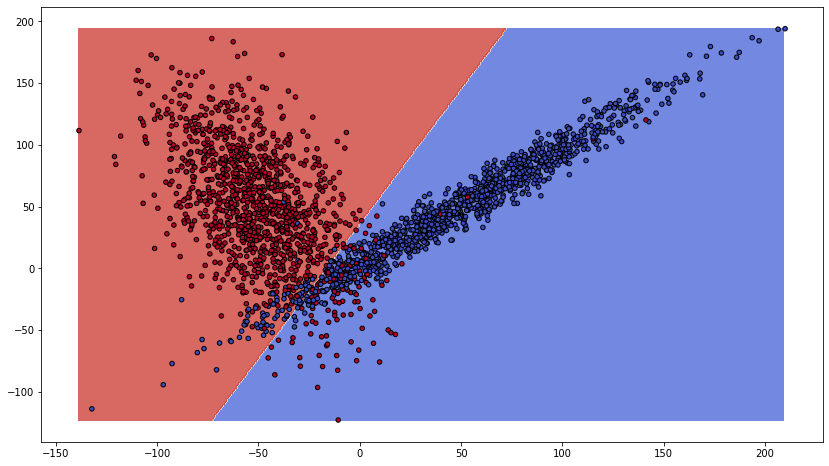

In [15]:
fig = plt.figure(figsize=(14, 8))
ax = fig.subplots(1, 1)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

## Part J

In [16]:
p=[]
t=[]
for i in range(X.shape[0]):
    x=int(clf.predict(np.c_[X[i][0],X[i][1]]))
    p.append(x)
    t.append(y[i])

In [17]:
avglist = ['binary', 'micro', 'macro', 'weighted']
for i in range(len(avglist)):
    a = avglist[i]
    f1score1=f1_score(t, p, average=a)
    print('F1 Score (%-8s): %8.5f' % (str(a), f1score1))

F1 Score (binary  ):  0.91190
F1 Score (micro   ):  0.91320
F1 Score (macro   ):  0.91318
F1 Score (weighted):  0.91318


## Part K

In [18]:
print('Matthews correlation coefficient (MCC):%8.5f' % (matthews_corrcoef(t, p)))

Matthews correlation coefficient (MCC): 0.82701


## Part L

In [19]:
print('Confusion Matrix (CM) \n=======================')
tn, fp, fn, tp = confusion_matrix(t, p).ravel()
print('TN =', '{:>6}'.format(tn), 
      'FP =', '{:>6}'.format(fp), 
      '\nFN =', '{:>6}'.format(fn), 
      'TP =', '{:>6}'.format(tp))

Confusion Matrix (CM) 
TN =   1160 FP =     85 
FN =    132 TP =   1123


## Part M

In [20]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrial Machine Learning\book\GitHub\Upload\industrial-machine-learning\Results\Chapter 04


In [21]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

In [22]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04','Chapter-004-Example-001-01.jpg'])
fig.savefig(imagename, bbox_inches='tight')

In [23]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-10-19 16:53:38.334462
